In [1]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2019_down4/2019_down4_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down4/2019_down4_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down4/2019_down4_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down4/2019_down4_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
#print(text)



In [3]:
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [4]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

9930

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

9930


In [26]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [27]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"reformation" + 0.000*"parallel" + 0.000*"threshold" + 0.000*"motivation" + 0.000*"shiraz" + 0.000*"probitcoin" + 0.000*"staterun" + 0.000*"peso–dollar"')
(1, '0.000*"unwary" + 0.000*"twotier" + 0.000*"caixin" + 0.000*"utter" + 0.000*"longestserving" + 0.000*"praxxis" + 0.000*"strawman" + 0.000*"quantumsecure"')
(2, '0.000*"jedling" + 0.000*"yevhen" + 0.000*"gigawatts" + 0.000*"ransom" + 0.000*"kanto" + 0.000*"wanderer" + 0.000*"subtle" + 0.000*"cryptomine"')
(3, '0.000*"pity" + 0.000*"elevation" + 0.000*"traceable" + 0.000*"escalate" + 0.000*"negotiation" + 0.000*"herve" + 0.000*"churchill" + 0.000*"proindustry"')


In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [29]:
sentences = article_contents

In [30]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec(sentences, min_count=1)

In [32]:
len(model.wv.vocab)

9930

In [33]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [35]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [36]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [37]:
temp_cluster_result['cluster'] = assigned_clusters

In [38]:
temp_cluster_result['raw_data'] = X.tolist()

In [39]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [40]:
from sklearn.metrics import pairwise_distances

In [41]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [42]:
len(cosine_centroid_list)

9930

In [43]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [44]:
sum(temp_distance[3])

87.27407429720608

In [45]:
import scipy.spatial.distance as dist

In [46]:
dist.cosine(X[0],cosine_centroid_list[0])

7.984535281868599e-05

In [47]:
dist.euclidean(X[0],cosine_centroid_list[0])

5.188879029048553

In [48]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [49]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [50]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
167,"[-0.036305394023656845, -0.9098864197731018, 0...",blockchain,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.001717,0.220985,0.780731,NaN
309,"[-0.0226006917655468, -0.8579816818237305, 0.1...",crypto,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.000089,0.204490,0.795599,NaN
544,"[-0.025302618741989136, -0.8288323879241943, 0...",exchange,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.000163,0.167619,0.832544,NaN
599,"[-0.03144793584942818, -0.8593320250511169, 0....",company,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.000087,0.154763,0.845324,NaN
665,"[-0.04652300849556923, -0.8771880865097046, 0....",bank,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.001149,0.137055,0.864094,NaN
0,"[-0.03558972477912903, -0.8072224259376526, 0....",cryptocurrency,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.000080,0.133659,0.866421,NaN
104,"[-0.05564039945602417, -0.7973507642745972, 0....",asset,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.001989,0.123228,0.878761,NaN
266,"[-0.04014362767338753, -0.9346732497215271, 0....",make,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.000074,0.118134,0.881941,NaN
196,"[-0.028393641114234924, -0.8207728862762451, 0...",report,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.000159,0.109159,0.891001,NaN
457,"[-0.028960227966308594, -0.8696942925453186, 0...",technology,0,"[-0.002929974, -0.08532105, 0.016897354, 0.053...",0.000554,0.098970,0.901584,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
191,"[-0.04369228333234787, -0.8351120352745056, 0....",bitcoin,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000178,0.366288,0.633891,NaN
1,"[-0.042790938168764114, -0.863093912601471, 0....",market,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000109,0.160584,0.839525,NaN
3,"[-0.03733888268470764, -0.8083969950675964, 0....",trade,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000170,0.152579,0.847590,NaN
18,"[-0.04606136307120323, -0.8486670255661011, 0....",price,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.001517,0.143119,0.858398,NaN
105,"[-0.0313035249710083, -0.8658239841461182, 0.1...",time,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000108,0.113767,0.886340,NaN
92,"[-0.03593526780605316, -0.8822808861732483, 0....",year,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000112,0.105762,0.894350,NaN
6,"[-0.02951819822192192, -0.8513291478157043, 0....",move,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000834,0.081020,0.919814,NaN
285,"[-0.034952014684677124, -0.8997359275817871, 0...",take,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000142,0.069861,0.930281,NaN
8,"[-0.03115363046526909, -0.8301078081130981, 0....",support,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.000186,0.066223,0.933963,NaN
137,"[0.014393677935004234, -1.1015431880950928, 0....",high,1,"[-0.0016278039, -0.04011151, 0.0065041822, 0.0...",0.004773,0.070104,0.934669,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
181,"[-0.0005484716384671628, -0.7741268873214722, ...",digital,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.005348,0.131718,0.873630,NaN
182,"[-0.06764201819896698, -0.7112513184547424, 0....",currency,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.007039,0.096787,0.910251,NaN
183,"[-0.026717878878116608, -0.7915535569190979, 0...",group,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.003844,0.041480,0.962363,NaN
177,"[0.008060942403972149, -0.7396931648254395, 0....",policy,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.000521,0.031050,0.969472,NaN
179,"[-0.00010105622641276568, -0.6196606755256653,...",operate,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.000990,0.030807,0.970183,NaN
184,"[-0.020427772775292397, -0.519232988357544, 0....",invest,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.005437,0.033960,0.971476,NaN
173,"[0.03571031987667084, -0.7714650630950928, 0.1...",standard,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.005026,0.028139,0.976887,NaN
178,"[0.008115500211715698, -0.47015756368637085, 0...",independent,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.003593,0.016495,0.987098,NaN
170,"[0.017607226967811584, -0.614749550819397, 0.1...",outlet,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.011699,0.019891,0.991808,NaN
175,"[0.03350480645895004, -0.47445037961006165, 0....",strict,2,"[-4.7684916e-05, -0.036290534, 0.013626617, 0....",0.007635,0.014312,0.993323,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4777,"[0.0025378011632710695, 0.006894779857248068, ...",algo,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.350699,0.000243,1.350457,NaN
4775,"[-0.004782184027135372, 0.0069314949214458466,...",intraweek,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.354240,0.000243,1.353997,NaN
5323,"[0.0017043051775544882, 0.0024155585560947657,...",kaiko,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.362219,0.000485,1.361734,NaN
1355,"[-0.003516868455335498, 0.0029813782311975956,...",bestperforming,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.374053,0.000243,1.373810,NaN
2799,"[-0.0013985901605337858, 0.003995605278760195,...",kuna,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.382834,0.000243,1.382592,NaN
4776,"[-0.0032525574788451195, -0.000606745714321732...",unus,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.395630,0.000243,1.395387,NaN
6285,"[-0.002837029518559575, 0.0022072885185480118,...",demystify,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.452065,0.000243,1.451822,NaN
306,"[0.0027379789389669895, 0.002602220047265291, ...",tradingview,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.519181,0.000243,1.518938,NaN
3115,"[0.004221836104989052, -0.001162913627922535, ...",enmesh,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.526002,0.000243,1.525759,NaN
5895,"[0.001501791994087398, 0.0017574590165168047, ...",​​tokens,3,"[0.00020227222, 0.0012022611, 0.00018789442, -...",0.548719,0.000243,1.548476,NaN


In [54]:
y_km = temp_cluster_result['cluster'].values

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

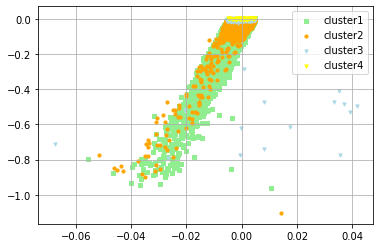

In [56]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 투자

7097

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 거래소

2514

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 제도

277

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈

42

In [61]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [63]:
kmeans.inertia_

617.5439138754075

In [64]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 0 0 ... 1 1 1]


In [65]:
cluster_values= list(model.wv.vocab)

In [66]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-617.54395


In [67]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [68]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7466246


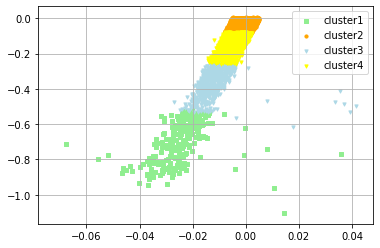

In [69]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [70]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [71]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [72]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [73]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [74]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [75]:
import scipy.spatial.distance as dist

In [76]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [77]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [78]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
569,"[-0.023077942430973053, -0.6891903281211853, 0...",interest,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.056067,0.044876,1.011191,NaN
395,"[-0.028521358966827393, -0.6874040961265564, 0...",public,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.047523,0.032748,1.014776,NaN
592,"[-0.027712851762771606, -0.6899641752243042, 0...",capital,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.061408,0.033475,1.027933,NaN
584,"[-0.030046116560697556, -0.6835151314735413, 0...",plan,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.070393,0.040753,1.029640,NaN
1137,"[-0.023617830127477646, -0.6952216029167175, 0...",allow,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.084204,0.037842,1.046362,NaN
725,"[-0.028100451454520226, -0.6964582800865173, 0...",create,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.103176,0.042208,1.060968,NaN
1211,"[-0.015336400829255581, -0.6739684343338013, 0...",wallet,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.099204,0.033960,1.065243,NaN
76,"[-0.024624209851026535, -0.6745079159736633, 0...",order,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.105864,0.031535,1.074329,NaN
229,"[-0.01948796771466732, -0.7082269787788391, 0....",change,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.114985,0.034688,1.080297,NaN
940,"[-0.022128324955701828, -0.6758031249046326, 0...",help,0,"[-0.024519484, -0.6933541, 0.13754368, 0.43510...",0.115858,0.034931,1.080927,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1510,"[-0.0035094106569886208, -0.020543845370411873...",klein,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.024923,0.000243,1.024680,NaN
3026,"[-4.497760528465733e-05, -0.022119907662272453...",intrigue,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.025766,0.000970,1.024796,NaN
1508,"[-0.0011344061931595206, -0.02501819096505642,...",lundqvist,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.025070,0.000243,1.024827,NaN
5100,"[-0.000721425109077245, -0.0181751511991024, 0...",billionaire,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.026930,0.001213,1.025717,NaN
3452,"[0.002916177734732628, -0.019443752244114876, ...",unspecified,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.026696,0.000970,1.025726,NaN
1723,"[-0.001115626422688365, -0.0256577767431736, 0...",cambridge,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.026365,0.000485,1.025880,NaN
9794,"[-0.0017457169014960527, -0.024168839678168297...",deodato,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.026213,0.000243,1.025970,NaN
4413,"[-0.005632822401821613, -0.020351538434624672,...",multicollateral,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.026710,0.000728,1.025982,NaN
5613,"[-0.001449923263862729, -0.021944429725408554,...",leisure,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.026502,0.000485,1.026016,NaN
2045,"[0.0021211369894444942, -0.020930228754878044,...",jobsready,1,"[-0.0008183874, -0.02266007, 0.0043833377, 0.0...",0.026322,0.000243,1.026079,NaN


In [80]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
465,"[-0.01651715487241745, -0.36783355474472046, 0...",expert,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.034383,0.010673,1.023710,NaN
2072,"[-0.009761182591319084, -0.36818408966064453, ...",complete,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.034904,0.010188,1.024716,NaN
1780,"[-0.007911883294582367, -0.3631177544593811, 0...",version,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.035225,0.009703,1.025522,NaN
5910,"[-0.012409170158207417, -0.37245887517929077, ...",grin,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.038690,0.010916,1.027774,NaN
1141,"[-0.008788042701780796, -0.3695448637008667, 0...",tool,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.042803,0.013099,1.029704,NaN
1312,"[-0.01236534584313631, -0.3660750389099121, 0....",certain,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.045311,0.011886,1.033424,NaN
589,"[-0.01503498200327158, -0.3693147301673889, 0....",license,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.047740,0.014312,1.033428,NaN
608,"[-0.012143682688474655, -0.37383389472961426, ...",allege,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.042990,0.008975,1.034015,NaN
986,"[-0.012591660022735596, -0.37587612867355347, ...",tweet,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.043981,0.009703,1.034278,NaN
1959,"[-0.00771630322560668, -0.36354026198387146, 0...",scheme,2,"[-0.012118331, -0.37002274, 0.07283506, 0.2316...",0.044721,0.009946,1.034775,NaN


In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9516,"[-0.009022535756230354, -0.1397099494934082, 0...",object,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.025930,0.002668,1.023261,NaN
1230,"[1.7088634194806218e-05, -0.14034049212932587,...",accessible,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.029305,0.005094,1.024211,NaN
89,"[-0.00853514764457941, -0.14277717471122742, 0...",jump,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.029887,0.005094,1.024793,NaN
5003,"[-0.0031845977064222097, -0.14519834518432617,...",fight,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.028941,0.003639,1.025303,NaN
8128,"[-0.007121482864022255, -0.14476074278354645, ...",cobalt,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.028863,0.003396,1.025467,NaN
630,"[-0.003460546024143696, -0.14149297773838043, ...",recognize,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.029642,0.004124,1.025518,NaN
691,"[-0.005789692513644695, -0.14235252141952515, ...",manipulation,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.029430,0.003881,1.025549,NaN
1992,"[-0.0010293533559888601, -0.1459280103445053, ...",collect,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.032407,0.005822,1.026585,NaN
1731,"[-0.009120053611695766, -0.1389904022216797, 0...",recession,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.030943,0.004124,1.026819,NaN
887,"[-0.009135952219367027, -0.14596858620643616, ...",efficient,3,"[-0.0049929814, -0.14334634, 0.027711987, 0.09...",0.031803,0.004851,1.026952,NaN


In [82]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #투자

252

In [83]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #이슈 

7944

In [84]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #인플

497

In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기타

1237

In [87]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [88]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.7466246 
temp_cluster_result['Silhouette'] = 0.7466246

In [89]:
temp_cluster_result1.to_csv("../cluster/en_news/2019_down4/en_news_2019_down4_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2019_down4/en_news_2019_down4_cosine.csv")

In [86]:
word_vectors = model.wv

In [87]:
vocabs = word_vectors.vocab.keys()

In [88]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [89]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99983716


In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [91]:
xys

array([[ 5.24881791e+00, -1.26302607e-02],
       [ 5.78282454e+00, -1.47231508e-01],
       [ 4.57849794e+00, -2.44094413e-02],
       ...,
       [-4.86083795e-01,  1.10294861e-03],
       [-4.42888858e-01, -6.69516784e-04],
       [-3.72977577e-01,  4.76761584e-03]])

In [92]:
xys[:,0]

array([ 5.24881791,  5.78282454,  4.57849794, ..., -0.4860838 ,
       -0.44288886, -0.37297758])

In [93]:
xys[:,1]

array([-0.01263026, -0.14723151, -0.02440944, ...,  0.00110295,
       -0.00066952,  0.00476762])

In [94]:
xs = xys[:,0]
ys = xys[:,1]

In [95]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8383 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3

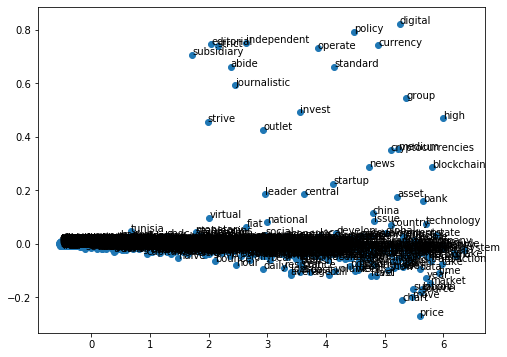

In [96]:
plot_2d_graph(vocabs,xs,ys)

In [97]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>